In [3]:
import pandas as pd
import numpy as np
import re

#READING DATA INTO PYTHON

The business.json file contains nested javascript objects, so it was necessary to convert the JSON file into a CSV file in order to process it in python. Since the yelp dataset challenge is more about analyzing the data than cleaning it, source code for converting the files was provided on their github page and shown below.

In [1]:
'''
Convert Yelp Academic Dataset from JSON to CSV

Requires Pandas (https://pypi.python.org/pypi/pandas)

By Paul Butler, No Rights Reserved
'''
 
import json
import pandas as pd
from glob import glob
 
def convert(x):
    ''' Convert a json string to a flat python dictionary
    which can be passed into Pandas. '''
    ob = json.loads(x)
    for k, v in ob.items():
        if isinstance(v, list):
            ob[k] = ','.join(v)
        elif isinstance(v, dict):
            for kk, vv in v.items():
                ob['%s_%s' % (k, kk)] = vv
            del ob[k]
    return ob
 
for json_filename in glob('*.json'):
    csv_filename = '%s.csv' % json_filename[:-5]
    print 'Converting %s to %s' % (json_filename, csv_filename)
    df = pd.DataFrame([convert(line) for line in file(json_filename)])
    df.to_csv(csv_filename, encoding='utf-8', index=False)

Converting business.json to business.csv


In [13]:
# business.json contains nested objects that may be empty, so read_csv
# was interpreting them as mixed types and throwing an error.
# source: http://stackoverflow.com/questions/28682562/pandas-read-csv-converting-mixed-types-columns-as-string

import warnings

target_type = str  # The desired output type

with warnings.catch_warnings(record=True) as ws:
    warnings.simplefilter("always")

    business = pd.read_csv('business.csv')
    print("Warnings raised:", ws)
    # We have an error on specific columns, try and load them as string
    for w in ws:
        s = str(w.message)
        print("Warning message:", s)
        match = re.search(r"Columns \(([0-9,]+)\) have mixed types\.", s)
        if match:
            columns = match.group(1).split(',') # Get columns as a list
            columns = [int(c) for c in columns]
            print("Applying %s dtype to columns:" % target_type, columns)
            mydata.iloc[:,columns] = mydata.iloc[:,columns].astype(target_type)

('Warnings raised:', [])


#EXAMINING THE DATA
Yelp provided a dataset with 61,184 business entries. First, let's take a look at the data provided for each business.

In [15]:
business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61184 entries, 0 to 61183
Data columns (total 58 columns):
attributes_Accepts Credit Cards         45072 non-null object
attributes_Accepts Insurance            458 non-null object
attributes_Ages Allowed                 235 non-null object
attributes_Alcohol                      20457 non-null object
attributes_Ambience                     18547 non-null object
attributes_Attire                       20390 non-null object
attributes_BYOB                         866 non-null object
attributes_BYOB/Corkage                 1315 non-null object
attributes_By Appointment Only          7922 non-null object
attributes_Caters                       13116 non-null object
attributes_Coat Check                   3699 non-null object
attributes_Corkage                      655 non-null object
attributes_Delivery                     19924 non-null object
attributes_Dietary Restrictions         175 non-null object
attributes_Dogs Allowed             

First, we want to learn about the different types of businesses available by looking at their categories.

In [66]:
categories = business['categories'].dropna().values
unique_biz, counts = np.unique(categories, return_counts=True)
print "Unique business categories: " + str(len(unique))
print unique_biz

Unique business categories: 8046
['Accessories,Fashion,Shopping,Cosmetics & Beauty Supply,Beauty & Spas'
 'Accessories,Fashion,Shopping,Shoe Stores,Jewelry'
 'Accountants,Professional Services' ...,
 'Yoga,Physical Therapy,Health & Medical,Trainers,Fitness & Instruction,Active Life'
 'Yoga,Physical Therapy,Massage Therapy,Health & Medical,Fitness & Instruction,Active Life'
 'Yoga,Tai Chi,Adult Education,Fitness & Instruction,Active Life,Education']


As seen above, a business can claim multiple categories, so first we must determine what categories are available to examine by filtering out the duplicates. In addition, we sorted by descending count for the category to see what popular categories we can analyze.

In [81]:
# create a string containing all of the categories from each business
all_categories = ','.join(x for x in categories)

#remove duplicates
unique_cat, counts = np.unique([x for x in all_categories.split(',')], return_counts=True)
for cat, count in sorted(zip(unique_cat, counts), key=lambda x: x[1], reverse=True):
    if (count > 50):
        print cat + ' ' + str(count)

Restaurants 21892
Shopping 8919
Food 7862
Beauty & Spas 4738
Nightlife 4340
Bars 3628
Health & Medical 3213
Automotive 2965
Home Services 2853
Fashion 2566
Active Life 2470
Event Planning & Services 2467
Fast Food 2383
Pizza 2223
Mexican 2208
Local Services 2144
Hotels & Travel 2131
American (Traditional) 2113
Sandwiches 1981
Arts & Entertainment 1946
Coffee & Tea 1890
Italian 1633
Chinese 1496
American (New) 1494
Burgers 1481
Hair Salons 1388
Hotels 1307
Nail Salons 1256
Grocery 1233
Auto Repair 1220
Home & Garden 1173
Pets 1153
Breakfast & Brunch 1116
Doctors 1077
Fitness & Instruction 1068
Specialty Food 1001
Bakeries 941
Women's Clothing 916
Ice Cream & Frozen Yogurt 867
Real Estate 850
Pubs 784
Cafes 776
Dentists 752
Japanese 746
Sports Bars 713
Sushi Bars 671
Delis 649
Professional Services 640
Pet Services 634
Sporting Goods 585
Convenience Stores 578
Desserts 576
Department Stores 573
Cosmetics & Beauty Supply 563
Drugstores 561
Gyms 560
Seafood 554
Steakhouses 554
Financial Se

Similarly, we can do the same for cities to determine which has the most number of Yelp reviews.

In [91]:
cities = business['city'].values
unique_cities, counts = np.unique(cities, return_counts=True)
print 'Unique cities: ' + str(len(unique_cities))
for count, city in sorted(zip(counts, unique_cities), reverse=True):
    if (count > 50):
        print str(city) + ' ' + str(count)

Unique cities: 378
Las Vegas 13601
Phoenix 8410
Charlotte 4224
Scottsdale 4039
Edinburgh 3031
Pittsburgh 2724
Mesa 2347
Tempe 2258
Henderson 2130
Montréal 1870
Chandler 1867
Madison 1758
Montreal 1384
Glendale 1377
Gilbert 1263
Karlsruhe 806
Peoria 688
North Las Vegas 616
Surprise 448
Champaign 398
Goodyear 354
Avondale 299
Matthews 272
Queen Creek 236
Urbana 213
Waterloo 200
Cave Creek 180
Middleton 166
Fort Mill 166
Pineville 137
Kitchener 134
Fountain Hills 129
Laval 120
Concord 120
Apache Junction 116
Casa Grande 114
Maricopa 111
Fitchburg 109
Paradise Valley 93
Buckeye 92
Litchfield Park 86
Sun Prairie 85
Sun City 84
Verdun 83
Anthem 83
Monona 71
Homestead 71
Laveen 67
Tolleson 61
Wickenburg 58
Belmont 54
Ettlingen 51


#Hypothesis 1:
My first hypothesis is that the standard deviation of ratings for a pizza place is higher and positively correlated with the number of pizza places in that area.

In [76]:
idx = business.categories.str.contains(r".*[Pp]izza.*", regex=True, na=False)
biz_pizza = business[idx]

In [93]:
cities = biz_pizza['city'].values
unique_cities, counts = np.unique(cities, return_counts=True)
print 'Total # of pizza businesses: ' + str(len(cities))
print 'Unique cities: ' + str(len(unique_cities))
for count, city in sorted(zip(counts, unique_cities), reverse=True):
    #if (count > 50):
    print str(city) + ' ' + str(count)

Total # of pizza businesses: 2223
Unique cities: 128
Las Vegas 394
Phoenix 293
Pittsburgh 164
Charlotte 156
Scottsdale 120
Mesa 85
Tempe 72
Glendale 64
Madison 63
Henderson 62
Chandler 57
Montreal 55
Gilbert 51
Peoria 40
Montréal 40
Edinburgh 40
Karlsruhe 39
North Las Vegas 30
Surprise 23
Goodyear 19
Champaign 18
Queen Creek 15
Matthews 15
Avondale 15
Urbana 13
Sun Prairie 11
Verdun 10
Fountain Hills 10
Laval 9
Cave Creek 9
Buckeye 9
Waterloo 8
Fort Mill 8
Maricopa 7
Kitchener 7
Anthem 7
Casa Grande 6
Monona 5
Middleton 5
Litchfield Park 5
Lasalle 5
Harrisburg 5
Fitchburg 5
Ettlingen 5
West Mifflin 4
Waunakee 4
Saint-Laurent 4
Laveen 4
El Mirage 4
Brossard 4
Belmont 4
Apache Junction 4
Wickenburg 3
Verona 3
Tolleson 3
Sun City 3
Mint Hill 3
Kirkland 3
Homestead 3
Gold Canyon 3
Carnegie 3
Bellevue 3
Weingarten 2
Swissvale 2
Sun City West 2
San Tan Valley 2
Sainte-Anne-De-Bellevue 2
Paradise 2
Outremont 2
McKees Rocks 2
Mc Farland 2
Indian Trail 2
Gila Bend 2
Florence 2
Dorval 2
Dollard-

We'll begin by getting the average and standard deviation of the ratings of pizza places in each city.

In [110]:
# sort cities by # of pizza places descending
city_list = [city for (count, city) in sorted(zip(counts, unique_cities), reverse=True)]

ratings_avg = {}
ratings_std = {}
num_places = {}

for city in city_list:
    biz_city = biz_pizza.loc[biz_pizza['city']==city]
    ratings = biz_city['stars'].dropna().values
    ratings_avg[city] = np.mean(ratings)
    ratings_std[city] = np.std(ratings)
    num_places[city] = len(ratings)

In [111]:
for city in city_list:
    print 'CITY: ' + city
    print ' # of pizza places: ' + str(num_places[city])
    print ' rating (avg): ' + str(ratings_avg[city])
    print ' rating (std): ' + str(ratings_std[city])

CITY: Las Vegas
 # of pizza places: 394
 rating (avg): 3.27284263959
 rating (std): 0.767220932984
CITY: Phoenix
 # of pizza places: 293
 rating (avg): 3.45733788396
 rating (std): 0.748643194903
CITY: Pittsburgh
 # of pizza places: 164
 rating (avg): 3.46646341463
 rating (std): 0.678797128268
CITY: Charlotte
 # of pizza places: 156
 rating (avg): 3.34615384615
 rating (std): 0.777519446157
CITY: Scottsdale
 # of pizza places: 120
 rating (avg): 3.59583333333
 rating (std): 0.623484273169
CITY: Mesa
 # of pizza places: 85
 rating (avg): 3.32941176471
 rating (std): 0.806418885372
CITY: Tempe
 # of pizza places: 72
 rating (avg): 3.29166666667
 rating (std): 0.710780087885
CITY: Glendale
 # of pizza places: 64
 rating (avg): 3.46875
 rating (std): 0.774974797977
CITY: Madison
 # of pizza places: 63
 rating (avg): 3.26984126984
 rating (std): 0.722788893335
CITY: Henderson
 # of pizza places: 62
 rating (avg): 3.37903225806
 rating (std): 0.744254790047
CITY: Chandler
 # of pizza places

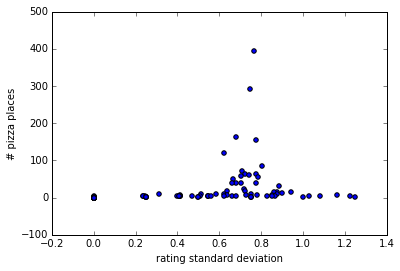

In [178]:
%matplotlib inline
from matplotlib import pyplot as plt

NUM_CITIES = 128

x = np.empty(NUM_CITIES)
y = np.empty(NUM_CITIES)

i = 0
for city in city_list:
    if (num_places[city] == 1):
        continue
    y[i] = num_places[city]
    x[i] = ratings_std[city]
    i += 1
plt.scatter(x,y)
plt.ylabel('# pizza places')
plt.xlabel('rating standard deviation')
plt.show()

#Conclusion 1
There was no statistical significance between the population density of pizza places in a given city compared to the standard deviation of the ratings.

#Additional Tests
Testing Hypothesis 1 with other business categories:

In [183]:
def test(name, list_cities=False, avg=False):
    exp = r".*"
    exp += name
    exp += r".*"
    idx = business.categories.str.contains(exp, flags=re.IGNORECASE, regex=True, na=False)
    biz_specific = business[idx]
    cities = biz_specific['city'].values
    unique_cities, counts = np.unique(cities, return_counts=True)
    print 'Total # of ' + name +  ' businesses: ' + str(len(cities))
    print 'Unique cities: ' + str(len(unique_cities))
    if list_cities:
        for count, city in sorted(zip(counts, unique_cities), reverse=True):
            if (count > 50):
                print str(city) + ' ' + str(count)

    # sort cities by # of pizza places descending
    city_list = [city for (count, city) in sorted(zip(counts, unique_cities), reverse=True)]

    ratings_avg = {}
    ratings_std = {}
    num_places = {}

    for city in city_list:
        biz_city = biz_specific.loc[biz_specific['city']==city]
        ratings = biz_city['stars'].dropna().values
        ratings_avg[city] = np.mean(ratings)
        ratings_std[city] = np.std(ratings)
        num_places[city] = len(ratings)

    # cap of 500 points to plot
    NUM_CITIES = len(city_list[:500])

    x = np.empty(NUM_CITIES)
    y = np.empty(NUM_CITIES)

    i = 0
    for city in city_list[:500]:
        if (num_places[city] == 1):
            continue
        y[i] = num_places[city]
        if avg:
            x[i] = ratings_avg[city]
        else: x[i] = ratings_std[city]
        i += 1
    plt.scatter(x,y)
    plt.ylabel('# of ' + name + ' places')
    if avg:
        plt.xlabel('rating average')
    else:
        plt.xlabel('rating standard deviation')
    plt.show()

Total # of restaurants businesses: 21892
Unique cities: 265


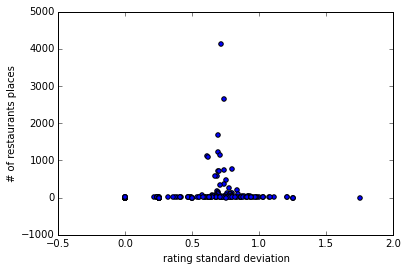

Total # of shopping businesses: 8919
Unique cities: 135


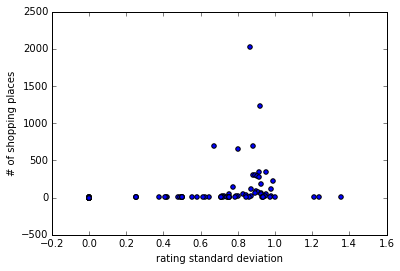

Total # of italian businesses: 1633
Unique cities: 119


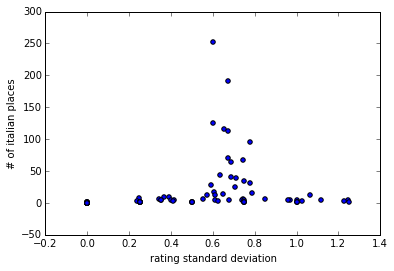

Total # of chinese businesses: 1511
Unique cities: 94


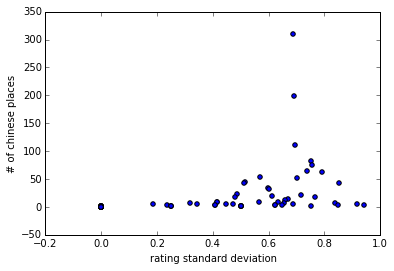

Total # of bakeries businesses: 941
Unique cities: 67


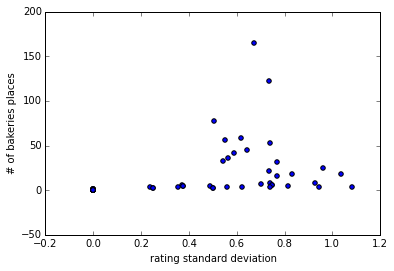

Total # of gyms businesses: 560
Unique cities: 46


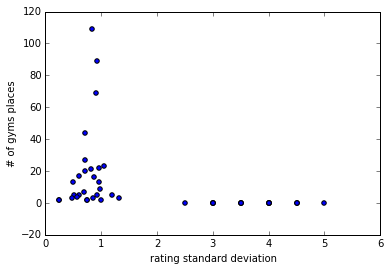

Total # of auto detailing businesses: 139
Unique cities: 26


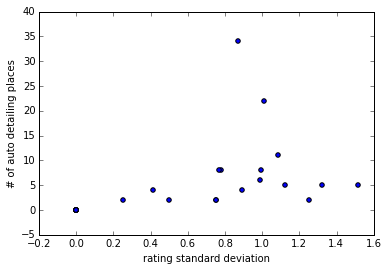

In [184]:
test('restaurants')
test('shopping')
test('italian')
test('chinese')
test('bakeries')
test('gyms')
test('auto detailing')

#Hypothesis 2
My hypothesis is that the more selective a shop is with its hours, the higher its ratings tend to be. My theory is that niche businesses can afford to be more selective with their hours, and will generally receive better reviews since they are not common and lack competition.

We'll begin by sampling the data since it would be hard to see a plot if it contained thousands of points.

In [340]:
import math

# only look at businesses who are still open
open_biz = business.loc[business['open']==True]

# take a random sample of size 200
rows = np.random.choice(open_biz.index.values, 200)
biz_sample = open_biz.ix[rows].fillna('')
biz_id = biz_sample['business_id'].values

Since we don't have a column that indicates the total number of hours a business is open weekly, we must calculate that from looking at the hours listed for each day of the week.

In [341]:
biz_hours = {}
biz_rating = {}

biz_days = [
    'hours_Monday',
    'hours_Tuesday',
    'hours_Wednesday',
    'hours_Thursday',
    'hours_Friday',
    'hours_Saturday',
    'hours_Sunday',
    ]

for id in biz_id:
    biz = biz_sample.loc[biz_sample['business_id']==id]
    hours = 0
    for day in biz_days:
        day_hours = biz[day].values[0]
        m = re.match(r"{u'close': u'(\d\d):\d\d', u'open': u'(\d\d):\d\d'}", day_hours)
        if not m:
            continue
        close = int(m.group(1))
        open = int(m.group(2))
        # if place is open past midnight
        if (open > close):
            hours += 24 - (open-close)
        else:
            hours += close - open
    
    biz_hours[id] = hours
    biz_rating[id] = round(biz['stars'].values[0], 1)

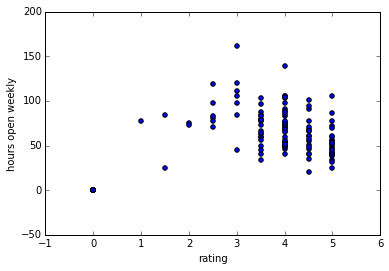

In [345]:
x = np.empty(len(biz_id))
y = np.empty(len(biz_id))

i=0
for id in biz_id:
    biz = biz_sample.loc[biz_sample['business_id']==id]
    if biz_hours[id]<=0 or biz_rating[id]==0:
        continue
    x[i] = biz_rating[id]
    y[i] = biz_hours[id]
    i += 1

plt.scatter(x,y)
plt.xlabel('rating')
plt.ylabel('hours open weekly')
plt.show()

#Conclusion 2
There was no statistical correlation between a business's open hours per week and its rating.

#Hypothesis 3
My next hypothesis is that businesses with similar check-in times can be grouped into the same category.

In [351]:
checkin = pd.read_csv('checkin.csv')

In [355]:
checkin.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45166 entries, 0 to 45165
Data columns (total 170 columns):
checkin_info.9-0     float64
checkin_info.9-1     float64
checkin_info.9-2     float64
checkin_info.9-3     float64
checkin_info.9-4     float64
checkin_info.9-5     float64
checkin_info.9-6     float64
checkin_info.20-2    float64
checkin_info.20-3    float64
checkin_info.20-0    float64
checkin_info.20-1    float64
checkin_info.20-6    float64
checkin_info.20-4    float64
checkin_info.20-5    float64
business_id          object
checkin_info.12-1    float64
checkin_info.12-0    float64
checkin_info.12-3    float64
checkin_info.12-2    float64
checkin_info.12-5    float64
checkin_info.12-4    float64
checkin_info.12-6    float64
checkin_info.2-1     float64
checkin_info.15-6    float64
checkin_info.15-4    float64
checkin_info.15-5    float64
checkin_info.15-2    float64
checkin_info.15-3    float64
checkin_info.15-0    float64
checkin_info.15-1    float64
checkin_info.17-1    

In [388]:
checkin.reindex_axis(sorted(checkin.columns), axis=1)
print list(checkin.columns.values)

['checkin_info.9-0', 'checkin_info.9-1', 'checkin_info.9-2', 'checkin_info.9-3', 'checkin_info.9-4', 'checkin_info.9-5', 'checkin_info.9-6', 'checkin_info.20-2', 'checkin_info.20-3', 'checkin_info.20-0', 'checkin_info.20-1', 'checkin_info.20-6', 'checkin_info.20-4', 'checkin_info.20-5', 'business_id', 'checkin_info.12-1', 'checkin_info.12-0', 'checkin_info.12-3', 'checkin_info.12-2', 'checkin_info.12-5', 'checkin_info.12-4', 'checkin_info.12-6', 'checkin_info.2-1', 'checkin_info.15-6', 'checkin_info.15-4', 'checkin_info.15-5', 'checkin_info.15-2', 'checkin_info.15-3', 'checkin_info.15-0', 'checkin_info.15-1', 'checkin_info.17-1', 'checkin_info.1-1', 'checkin_info.22-4', 'checkin_info.22-5', 'checkin_info.22-6', 'checkin_info.22-0', 'checkin_info.22-1', 'checkin_info.22-2', 'checkin_info.22-3', 'checkin_info.2-0', 'checkin_info.11-2', 'checkin_info.11-3', 'checkin_info.11-0', 'checkin_info.11-1', 'checkin_info.11-6', 'checkin_info.11-4', 'checkin_info.11-5', 'checkin_info.16-5', 'checki

We can see that the data lists the checkin info for a specific hour for each day of the week. First, we must filter the data and omit those with a small number of checkins. We must also fill the missing values with zeroes.

In [364]:
checkin.fillna(0)
checkin['total_checkin']=checkin.sum(axis=1)

In [377]:
df = checkin.loc[checkin['total_checkin']>400]
print len(df)
pearson = df.corr()

6701


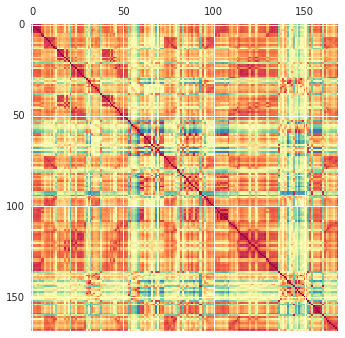

In [385]:
from matplotlib import cm
plt.matshow(pearson, cmap=cm.Spectral_r, interpolation='none', vmin=0, vmax=1)

In [381]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

rs = np.random.RandomState(33)
d = rs.normal(size=(100, 30))

f, ax = plt.subplots(figsize=(9, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.corrplot(d, annot=False, sig_stars=False,
             diag_names=False, cmap=cmap, ax=ax)
f.tight_layout()

ImportError: No module named matploblib.cm

In [75]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("theme/custom.css", "r").read()
    return HTML(styles)
css_styling()